# EDA(exploratory data analysis): 탐색적 데이터 분석

- 그래프를 통한 시각화와 통계 분석 등을 바탕으로 수집한 데이터를 다양한 각도에서 관찰하고 이해하는 방법
- 데이터를 여러 각도에서 살펴보면서 데이터의 전체적인 양상과 보이지 않던 현상을 더 잘 이해할 수 있도록 도와줌
- 문제 정의 단계에서 발견하지 못한 패턴을 발견하고, 이를 바탕으로 데이터 전처리 및 모델에 관한 가설을 추가하거나 수정할 수 있음
- 본격적인 데이터 분석에 앞서 구체적인 분석 계획을 수립하는데 도움이 됨

In [1]:
import numpy as np
from scipy.stats import *
import pandas as pd

# 1. 대표 통계량

## 산술 평균

- 가장 흔하게 쓰이는 평균으로 연속형 변수에 사용
- 매우 크거나 작은 값에 크게 영향을 받음

In [3]:
x = [1, 2, 3, 4, 5]

print(np.mean(x))
print(np.array(x).mean())
print(pd.Series(x).mean())

3.0
3.0
3.0


In [4]:
# 이진 변수에 대한 평균

x = [1, 0, 0, 0, 1]

np.mean(x)

0.4

## 조화 평균

- 비율 및 변화율 등에 대한 평균을 계산할 때 사용(데이터의 역수의 산술 평균의 역수)

In [5]:
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5])

print(len(x) / np.sum(1 / x))
print(hmean(x))

0.21897810218978103
0.21897810218978103


## 절사 평균

- 데이터에서 a ~ 1 - a의 범위에 속하는 데이터에 대해서만 평균을 냄
- 매우 크거나 작은 값에 의한 영향을 받지 않음

In [6]:
income = np.random.normal(2000000, 500000, 100)     # 평균이 2백만원이고 표준편차가 50만원인 정규분포를 따르는 소득을 갖는 100명 생성

print(np.mean(income))     # 산술평균

1973891.3443000466


In [7]:
income = np.append(income, 10 ** 9)     # 소득이 10억원인 사람 추가

print(np.mean(income))     # 100명의 소득이 200만원에 가까운데, 한 명 때문에 산술평균이 1200만원에 달함

11855337.96465351


In [8]:
# 절사평균

trim_mean(income, 0.2)     # 전체의 20% ~ 80%만 가지고 산술평균 계산

2010567.0713285822

## 최빈값

In [11]:
x = np.random.choice(['A', 'B', 'C'], 1000)
x[:10]

array(['A', 'C', 'B', 'C', 'B', 'A', 'C', 'C', 'B', 'A'], dtype='<U1')

In [12]:
mode(x)     # [0]: 최빈값 = A, [1]: 빈도 = 347번

ModeResult(mode=array(['A'], dtype='<U1'), count=array([347]))

In [13]:
pd.Series(x).value_counts().index[0]     # 맨 앞(0)에 있는 것이 최빈값

'A'

In [14]:
pd.Series(x).value_counts()

A    347
B    332
C    321
dtype: int64

# 2. 산포 통계량

## 분산

In [16]:
x = [1, 2, 3, 4, 5]

print(np.var(x, ddof = 1))     # 분모 = n - 1 = (5 - 1) / ddof = 자유도
print(np.array(x).var())     # 분모 = n
print(pd.Series(x).var(ddof = 0))     # 분모 = n

2.5
2.0
2.0


## 표준편차

In [17]:
x = [1, 2, 3, 4, 5]

print(np.std(x, ddof = 1))
print(np.array(x).std())
print(pd.Series(x).std(ddof = 1))

1.5811388300841898
1.4142135623730951
1.5811388300841898


## 변동계수 = 표준편차 / 평균

In [18]:
x1 = np.array([1, 2, 3, 4, 5])
x2 = x1 * 10

print(np.std(x1, ddof = 1))
print(np.std(x2, ddof = 1))

1.5811388300841898
15.811388300841896


In [19]:
# 변동계수

print(np.std(x1, ddof = 1) / np.mean(x1))
print(np.std(x2, ddof = 1) / np.mean(x2))

print()

print(variation(x1))
print(variation(x2))

0.5270462766947299
0.5270462766947299

0.47140452079103173
0.4714045207910317


## 스케일링

- standard scaling
- minmax scaling

In [23]:
x1 = np.array([1, 2, 3, 4, 5])
x2 = x1 * 10

print(x1)
print(x2)

[1 2 3 4 5]
[10 20 30 40 50]


### standard scaling

In [24]:
# 방법1

z1 = (x1 - x1.mean()) / x1.std()
z2 = (x2 - x2.mean()) / x2.std()

print(z1)
print(z2)

[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]


In [25]:
# 방법2

x = pd.DataFrame({'x1': [1, 2, 3, 4, 5],
                 'x2': [10, 20, 30, 40, 50]})

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

z = pd.DataFrame(scaler.fit_transform(x))
z

,0,1
0,-1.414214,-1.414214
1,-0.707107,-0.707107
2,0.000000,0.000000
3,0.707107,0.707107
4,1.414214,1.414214


### minmax scaling

In [26]:
# 방법1

z1 = (x1 - x1.min()) / (x1.max() - x1.min())
z2 = (x2 - x2.min()) / (x2.max() - x2.min())

print(z1)
print(z2)

[0.   0.25 0.5  0.75 1.  ]
[0.   0.25 0.5  0.75 1.  ]


In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

z = pd.DataFrame(scaler.fit_transform(x))
z

,0,1
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


## 범위와 사분위 범위

In [29]:
x = np.random.normal(100, 20, size = 1000)
x

array([111.74913483,  78.34198763, 130.05988505,  85.33492806,
        82.60710241, 112.40373071,  97.36080919, 142.09164734,
       102.24156938, 102.71064035, 125.82951436,  82.02388454,
       130.19676952, 117.28258745, 108.6522741 ,  97.51236449,
       123.47677596, 131.31935491,  99.94582899,  97.81020513,
        93.20924935,  77.88339733,  80.53498367, 126.02938618,
       110.16794077,  75.68070234, 120.50298529, 132.17309348,
       114.72627007,  95.38550851, 111.69798617,  78.62688045,
       115.5971239 ,  98.777701  , 108.03896669,  89.80583376,
       108.42717404, 102.96719807, 108.39837412, 107.1751147 ,
        92.14846811, 150.435262  , 145.45195048, 106.95898985,
        91.10162547, 102.43655635, 123.2322012 , 151.76474972,
       124.55566545,  59.50484571, 104.47548382, 133.39763662,
        93.33066692, 117.43785276,  63.17890727,  71.65933076,
        69.05555234,  95.35764741,  98.56911303,  91.75796772,
       119.48550969, 105.5969698 ,  91.87001746, 116.85

### 범위

In [30]:
print(np.ptp(x))
print(np.max(x) - np.min(x))

122.12239436704064
122.12239436704064


### 사분위 범위 = Q3 - Q1

In [31]:
print(np.quantile(x, 0.75) - np.quantile(x, 0.25))
print(iqr(x))

27.49551778655683
27.49551778655683


# 3. 분포 통계량

## 백분위수 및 사분위수

In [32]:
x = np.arange(1, 12, 1)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [33]:
print(np.percentile(x, 10))
print(np.quantile(x, 0.1))

2.0
2.0


In [34]:
print(np.percentile(x, 25))
print(np.quantile(x, 0.25))

3.5
3.5


## 왜도

- 분포의 비대칭도를 나타냄
- 왜도의 절대값이 1.5이상이면 치우침
- 왜도 < 0 이면 오른쪽으로 치우침(왼쪽 꼬리)
- 왜도 > 0 이면 왼쪽으로 치우침(오른쪽 꼬리)

In [35]:
%matplotlib inline
from matplotlib import pyplot as plt

x1 = [1] * 30 + [2] * 20 + [3] * 20 + [4] * 15 + [5] * 15     # 좌측으로 치우침
x2 = [1] * 15 + [2] * 20 + [3] * 30 + [4] * 20 + [5] * 15     # 치우치지 않음
x3 = [1] * 15 + [2] * 15 + [3] * 20 + [4] * 20 + [5] * 30     # 우측으로 치우침

print(x1)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [36]:
pd.Series(x1).value_counts(sort = False)

1    30
2    20
3    20
4    15
5    15
dtype: int64

<AxesSubplot:>

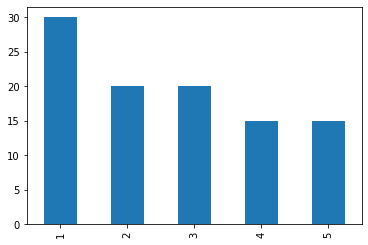

In [38]:
pd.Series(x1).value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

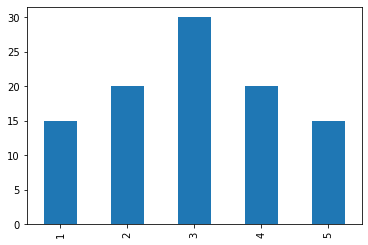

In [39]:
pd.Series(x2).value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

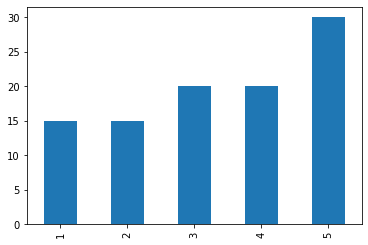

In [40]:
pd.Series(x3).value_counts(sort = False).plot(kind = 'bar')

In [41]:
print('좌로 치우쳤을 때 왜도: ', skew(x1))
print('치우치지 않았을 때 왜도: ', skew(x2))
print('우로 치우쳤을 때 왜도: ', skew(x3))

좌로 치우쳤을 때 왜도:  0.3192801008486361
치우치지 않았을 때 왜도:  0.0
우로 치우쳤을 때 왜도:  -0.31928010084863606


## 첨도

- 데이터의 분포가 얼마나 뾰족한 지를 나타냄
- 첨도가 높을수록 이 변수가 좁은 범위에 많은 값들이 몰림을 의미함

In [42]:
x1 = [1] * 20 + [2] * 20 + [3] * 20 + [4] * 20 + [5] * 20     # 전혀 뾰족하지 않음
x2 = [1] * 10 + [2] * 20 + [3] * 40 + [4] * 20 + [5] * 10     # 조금 뾰족함
x3 = [1] * 5 + [2] * 15 + [3] * 60 + [4] * 15 + [5] * 5     # 매우 뾰족

<AxesSubplot:>

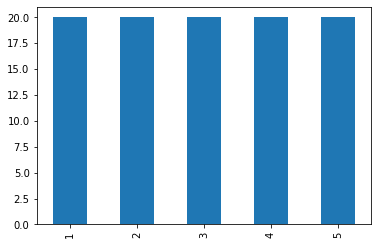

In [43]:
pd.Series(x1).value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

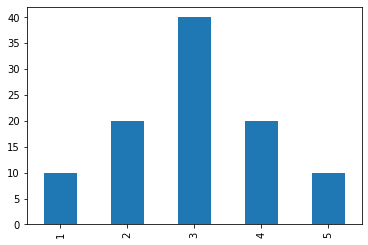

In [44]:
pd.Series(x2).value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

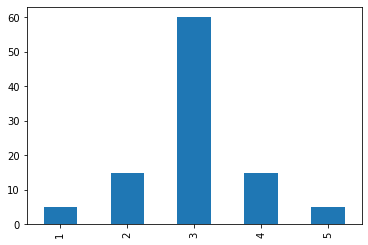

In [45]:
pd.Series(x3).value_counts(sort = False).plot(kind = 'bar')

In [46]:
print('전혀 뾰족하지 않을 때 첨도: ', kurtosis(x1))
print('조금 뾰족할 때 첨도: ', kurtosis(x2))
print('매우 뾰족할 때 첨도: ', kurtosis(x3))

전혀 뾰족하지 않을 때 첨도:  -1.3
조금 뾰족할 때 첨도:  -0.5
매우 뾰족할 때 첨도:  0.8775510204081636
